In [ ]:
!pip install kaggle

In [23]:
! mkdir ~/.kaggle
     

! cp kaggle.json ~/.kaggle/
     

! chmod 600 ~/.kaggle/kaggle.json
     

! kaggle datasets download uciml/sms-spam-collection-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 75.5MB/s]


In [24]:
! unzip '/content/sms-spam-collection-dataset.zip'

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [ ]:
!pip install tensorflow_text

In [6]:
import tensorflow_hub as hub
import tensorflow_text as text

In [10]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [11]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [12]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [13]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [14]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['encoder_outputs', 'sequence_output', 'pooled_output', 'default'])

In [15]:
bert_results['sequence_output']#128 padding

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292052,  0.0856782 ,  0.14476837, ..., -0.09677092,
          0.08722129,  0.07711072],
        [ 0.1783944 , -0.19006099,  0.5034946 , ..., -0.05869839,
          0.32717127, -0.15578558],
        [ 0.18701541, -0.43388733, -0.48875114, ..., -0.15502825,
          0.00145149, -0.24470972],
        ...,
        [ 0.1208304 ,  0.12884238,  0.4645356 , ...,  0.07375551,
          0.17441969,  0.16522141],
        [ 0.07967842, -0.01190668,  0.5022541 , ...,  0.13777801,
          0.210022  ,  0.00624551],
        [-0.0721268 , -0.28303453,  0.5903342 , ...,  0.47551954,
          0.16668472, -0.08920333]],

       [[-0.07900575,  0.3633509 , -0.21101615, ..., -0.17183736,
          0.16299713,  0.6724265 ],
        [ 0.27883476,  0.43716246, -0.35764748, ..., -0.04463608,
          0.38315183,  0.58879906],
        [ 1.2037674 ,  1.0727015 ,  0.484087  , ...,  0.2492104 ,
          0.40730947,  0.4048182 ],
        ...,

In [16]:
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917742 , -0.21411917,  0.49769565, ...,  0.24465217,
        -0.47334474,  0.8175871 ],
       [-0.9171231 , -0.4793516 , -0.7865695 , ..., -0.6175173 ,
        -0.7102685 ,  0.92184305]], dtype=float32)>

In [17]:
bert_results['encoder_outputs']

[<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
 array([[[ 0.1290142 ,  0.00644748, -0.03614981, ...,  0.04999622,
           0.0614919 , -0.02657544],
         [ 1.1753383 ,  1.2140787 ,  1.1569978 , ...,  0.11634371,
          -0.35855392, -0.4049018 ],
         [ 0.03859041,  0.53870016, -0.2108976 , ...,  0.21858224,
           0.7260168 , -1.1158608 ],
         ...,
         [-0.0758702 , -0.25421935,  0.70755106, ...,  0.50541997,
          -0.18878675,  0.1502836 ],
         [-0.16066593, -0.2808966 ,  0.5759706 , ...,  0.5275857 ,
          -0.11141382,  0.02887538],
         [-0.04428159, -0.20279583,  0.5909351 , ...,  0.81338346,
          -0.3907584 , -0.02601748]],
 
        [[ 0.18903565,  0.02752538, -0.06513739, ..., -0.00620211,
           0.15053883,  0.03165444],
         [ 0.5916148 ,  0.75891393, -0.07240677, ...,  0.6190399 ,
           0.8292891 ,  0.16161975],
         [ 1.446083  ,  0.4460266 ,  0.40990236, ...,  0.48255914,
           0.62691176,  0.13

# SMS Classification

In [18]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [25]:
df = pd.read_csv("/content/spam.csv", encoding = "ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
df = df.loc[:, df.columns.isin(["v1", "v2"])]

In [27]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [28]:
df_spam = df[df['v1']=='spam']
df_spam.shape

(747, 2)

In [29]:
df_ham = df[df['v1']=='ham']
df_ham.shape

(4825, 2)

In [30]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Encode the text data as numeric values
# vectorizer = TfidfVectorizer()
# X_train_encoded = vectorizer.fit_transform(df["v2"])

# # Apply SMOTE-Tomek to the training data
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train_encoded, df["v1"])

# # Convert the numeric data back to text data
# X_resampled = vectorizer.inverse_transform(X_resampled)

In [31]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [32]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [33]:
df_balanced['spam']=df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,v1,v2,spam
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...,0
1870,ham,"Aight, I'll text you when I'm back",0
2432,ham,Really dun bluff me leh... U sleep early too. ...,0
5098,spam,TheMob>Hit the link to get a premium Pink Pant...,1
2294,spam,You have 1 new message. Please call 08718738034.,1


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'],df_balanced['spam'], stratify=df_balanced['spam'])

In [35]:
X_train.head(4)

3681    Hello, hello, hi lou sorry it took so long 2 r...
349     Just checking in on you. Really do miss seeing...
3663     Huh? 6 also cannot? Then only how many mistakes?
1408         I've got ten bucks, jay is being noncomittal
Name: v2, dtype: object

## Now lets import BERT model and get embeding vectors for few sample statements

In [36]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [37]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.71745336,  0.88082975]], dtype=float32)>

In [38]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [40]:
cosine_similarity([e[0]],[e[3]])

array([[0.84703803]], dtype=float32)

In [41]:
cosine_similarity([e[3]],[e[4]]) # Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

array([[0.9872035]], dtype=float32)

In [42]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [44]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [45]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 23s 340ms/step - loss: 0.6287 - accuracy: 0.6438 - precision: 0.6371 - recall: 0.6679
Epoch 2/10
35/35 [==============================] - 12s 352ms/step - loss: 0.5107 - accuracy: 0.8018 - precision: 0.7986 - recall: 0.8071
Epoch 3/10
35/35 [==============================] - 12s 353ms/step - loss: 0.4468 - accuracy: 0.8402 - precision: 0.8279 - recall: 0.8589
Epoch 4/10
35/35 [==============================] - 13s 367ms/step - loss: 0.4038 - accuracy: 0.8571 - precision: 0.8413 - recall: 0.8804
Epoch 5/10
35/35 [==============================] - 12s 352ms/step - loss: 0.3750 - accuracy: 0.8821 - precision: 0.8768 - recall: 0.8893
Epoch 6/10
35/35 [==============================] - 12s 350ms/step - loss: 0.3534 - accuracy: 0.8813 - precision: 0.8687 - recall: 0.8982
Epoch 7/10
35/35 [==============================] - 12s 350ms/step - loss: 0.3274 - accuracy: 0.8866 - precision: 0.8818 - recall: 0.8929
Epoch 8/10
35/35 [================

In [46]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 326ms/step - loss: 0.2720 - accuracy: 0.9198 - precision: 0.8985 - recall: 0.9465


[0.2719546854496002,
 0.9197860956192017,
 0.8984771370887756,
 0.9465240836143494]

In [47]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 5s 351ms/step


In [48]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[167,  20],
       [ 10, 177]])

Text(50.722222222222214, 0.5, 'Truth')

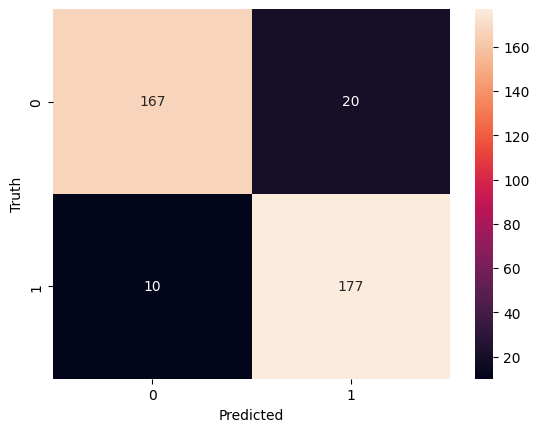

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       187
           1       0.90      0.95      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [52]:
#Inference
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 1s 825ms/step


array([[0.797057  ],
       [0.8433405 ],
       [0.8021096 ],
       [0.1929587 ],
       [0.10215032]], dtype=float32)

In [53]:
model.save('model.h5')